In [1]:
from locallib import analysis, eyeutil

msgs = [
    [53, 81, 17, 27, 58, 15, 59, 78, 35, 37, 4, 50, 62, 21, 75, 40, 72, 26, 32, 17, 71, 24, 53, 2, 9, 2, 52, 9, 20, 2, 53, 3, 73, 11, 81, 73, 71, 81, 31, 39, 34, 25, 81, 76, 71, 3, 45, 12, 45, 68, 9, 38, 8, 16, 48, 5, 33, 45, 73, 3, 76, 34, 65, 71, 81, 77, 34, 55, 39, 17, 24, 67, 48, 56, 23, 80, 19, 33, 48, 45, 23, 61, 5, 48, 14, 66, 77, 2, 19, 37, 35, 43, 64, 56, 0, 78, 64, 28, 30, 15, 7, 25, 18, 7, 21, 30, 18, 7, 62, 64, 15, 44, 18, 70, 18, 40, 21, 60, 40, 72, 36, 65, 21, 78, 35, 5, 33, 29, 37, 35, 43, 42, 43, 82, 30, 28, 72, 31],
    [12, 81, 17, 27, 58, 15, 59, 78, 35, 37, 4, 50, 62, 21, 75, 40, 72, 26, 32, 17, 71, 24, 53, 2, 9, 2, 52, 20, 22, 52, 77, 3, 73, 11, 81, 52, 73, 11, 63, 39, 34, 25, 81, 76, 71, 3, 45, 12, 45, 68, 9, 38, 8, 16, 48, 33, 5, 10, 33, 14, 9, 23, 66, 33, 38, 68, 23, 45, 53, 10, 20, 68, 9, 23, 61, 46, 7, 17, 41, 36, 71, 65, 70, 18, 39, 22, 26, 24, 55, 81, 26, 52, 63, 34, 41, 72, 81, 31, 73, 67, 52, 34, 81, 31, 55, 31, 73, 77, 6, 16, 38, 2, 10, 37, 8, 10, 66, 38, 8, 45, 2, 9, 68, 14, 19, 67, 38, 20, 9, 2, 14, 8, 1],
    [52, 81, 17, 27, 58, 15, 59, 78, 35, 37, 4, 50, 62, 21, 75, 40, 72, 26, 32, 17, 71, 24, 53, 2, 9, 2, 52, 20, 19, 29, 48, 2, 52, 53, 45, 1, 9, 16, 52, 26, 72, 41, 79, 60, 82, 36, 71, 6, 63, 26, 71, 76, 71, 3, 66, 38, 19, 16, 38, 22, 11, 53, 22, 20, 67, 12, 63, 13, 71, 65, 41, 82, 21, 43, 46, 64, 37, 43, 30, 43, 30, 62, 46, 61, 4, 35, 56, 14, 29, 56, 59, 4, 29, 19, 37, 9, 68, 66, 33, 1, 8, 38, 45, 67, 9, 53, 24, 11, 3, 52, 9, 77, 20, 2, 67, 11, 55, 2, 53, 2, 14, 48, 29, 48, 47, 5, 49, 64, 0, 64, 51, 61, 57],
    [77, 81, 17, 24, 39, 22, 26, 77, 66, 29, 66, 16, 38, 73, 39, 34, 63, 27, 36, 65, 40, 25, 26, 65, 76, 79, 13, 79, 40, 21, 30, 18, 36, 18, 7, 36, 82, 60, 40, 28, 79, 32, 34, 17, 58, 28, 50, 56, 57, 29, 16, 10, 49, 80, 42, 78, 74, 4, 51, 60, 62, 42, 78, 15, 46, 40, 21, 79, 27, 55, 34, 25, 17, 13, 71, 76, 41, 17, 79, 72, 65, 81, 71, 32, 24, 69, 6, 24, 31, 71, 6, 77, 12, 67, 77, 12, 31, 81, 34, 31, 26, 72, 25, 27, 32, 41, 71, 81, 31, 73, 32, 70, 79, 58, 28, 7, 44, 17, 63, 76, 3, 63, 81, 39, 24],
    [6, 81, 17, 24, 39, 22, 26, 77, 66, 29, 59, 15, 35, 46, 60, 30, 0, 35, 56, 57, 5, 8, 59, 62, 42, 54, 42, 80, 43, 0, 30, 64, 56, 74, 61, 68, 74, 42, 59, 15, 58, 79, 28, 40, 7, 70, 18, 58, 44, 41, 36, 82, 58, 79, 58, 79, 39, 81, 63, 55, 71, 31, 6, 16, 69, 1, 66, 14, 47, 14, 69, 67, 48, 45, 2, 67, 38, 68, 14, 29, 0, 51, 47, 57, 56, 59, 61, 46, 50, 35, 54, 70, 40, 54, 62, 50, 40, 42, 78, 50, 0, 35, 56, 80, 74, 56, 19, 48, 2, 12, 81, 3, 53, 63, 72, 34, 18, 36, 82, 65, 36, 72, 65, 31, 32, 26, 34, 18, 70, 18, 39],
    [22, 81, 17, 24, 39, 22, 26, 77, 66, 29, 59, 78, 64, 46, 62, 60, 70, 32, 17, 18, 36, 58, 70, 40, 7, 30, 7, 54, 62, 75, 42, 75, 62, 64, 78, 21, 82, 54, 41, 79, 72, 81, 77, 66, 53, 6, 77, 34, 65, 21, 79, 60, 42, 62, 50, 82, 78, 50, 15, 58, 27, 18, 7, 36, 7, 13, 27, 76, 13, 65, 70, 18, 34, 71, 39, 18, 36, 82, 75, 58, 60, 4, 78, 60, 21, 75, 78, 28, 65, 28, 65, 79, 13, 65, 28, 72, 40, 82, 44, 65, 36, 70, 30, 79, 60, 28, 13, 79, 76, 34, 77, 26, 53, 1, 9, 57, 23, 16, 6, 67, 38, 3, 6, 63, 34, 52, 11, 81],
    [3, 81, 17, 24, 39, 22, 26, 77, 66, 29, 59, 15, 35, 78, 21, 50, 43, 42, 50, 80, 59, 57, 16, 38, 67, 19, 68, 9, 10, 9, 1, 33, 53, 2, 53, 1, 67, 33, 20, 45, 16, 9, 29, 14, 69, 11, 17, 31, 17, 32, 11, 71, 11, 34, 55, 52, 1, 57, 19, 57, 47, 0, 59, 74, 64, 21, 15, 64, 4, 59, 15, 58, 41, 21, 65, 18, 41, 79, 40, 41, 79, 70, 32, 17, 72, 36, 31, 6, 63, 69, 10, 9, 1, 52, 26, 31, 22, 69, 3, 71, 73, 55, 77, 24, 71, 31, 6, 81, 39, 17, 40, 41, 21, 18],
    [73, 81, 17, 24, 39, 22, 26, 77, 66, 29, 59, 15, 35, 78, 21, 50, 43, 42, 50, 80, 59, 57, 16, 67, 1, 53, 26, 65, 70, 18, 13, 79, 7, 58, 25, 70, 72, 25, 72, 40, 62, 64, 5, 14, 2, 20, 14, 74, 29, 5, 74, 14, 8, 29, 45, 48, 8, 33, 1, 16, 68, 9, 67, 68, 19, 74, 51, 57, 10, 33, 53, 67, 45, 77, 31, 11, 77, 69, 67, 11, 52, 55, 73, 67, 69, 2, 24, 27, 81, 65, 13, 79, 27, 11, 31, 26, 32, 39, 34, 31, 13, 18, 79, 17, 7, 36, 18, 25, 18, 82, 58, 7, 17, 79, 54, 30, 0, 64, 51, 4, 61, 68, 45],
    [55, 81, 17, 24, 39, 22, 26, 77, 66, 29, 59, 15, 35, 78, 21, 50, 43, 42, 50, 80, 59, 57, 16, 1, 53, 66, 1, 47, 5, 8, 29, 9, 38, 14, 2, 12, 45, 77, 16, 1, 57, 4, 35, 21, 50, 40, 72, 65, 81, 71, 63, 11, 2, 16, 67, 24, 27, 58, 65, 41, 13, 17, 31, 34, 77, 3, 55, 38, 52, 3, 73, 52, 53, 66, 45, 23, 19, 33, 57, 0, 80, 57, 8, 19, 80, 56, 64, 35, 62, 35, 78, 50, 62, 54, 79, 76, 18, 25, 63, 39, 71, 41, 79, 60, 30, 42, 28, 30, 82, 75, 62, 30, 50, 60, 15, 43, 35, 42]
]


Overview
---------
Messages: 9
Message lengths: [138, 133, 133, 125, 131, 128, 114, 123, 118]

Ascii of message (1 - 9)
-------------------------
Note: This will break for messages with values > 95

Uq1;Z/[nCE$R^5kHh:@1g8U")"T)4"U#i+qigq?GB9qlg#M,Md)F(0P%AMi#lBagqmBWG18cPX7p3APM7]%P.bm"3ECK`X n`<>/'92'5>2'^`/L2f2H5\HhDa5nC%A=ECKJKr><h?
,q1;Z/[nCE$R^5kHh:@1g8U")"T46Tm#i+qTi+_GB9qlg#M,Md)F(0PA%*A.)7bAFd7MU*4d)7]N'1IDgaf2G6:8Wq:T_BIhq?icTBq?W?im&0F"*E(*bF(M")d.3cF4)".(!
Tq1;Z/[nCE$R^5kHh:@1g8U")"T43=P"TUM!)0T:hIo\rDg&_:glg#bF30F6+U64c,_-gaIr5KN`EK>K>^N]$CX.=X[$=3E)dbA!(FMc)U8+#T)m4"c+W"U".P=PO%Q` `S]Y
mq18G6:mb=b0FiGB_;DaH9:alo-oH5>2D2'Dr\H<o@B1Z<RXY=0*QpJnj$S\^Jn/NH5o;WB91-glI1ohaqg@8e&8?g&m,cm,?qB?:h9;@Igq?i@foZ<'L1_l#_qG8
&q18G6:mb=[/CN\> CXY%([^JVJpK >`Xj]djJ[/Zo<H'f2ZLIDrZoZoGq_Wg?&0e!b.O.ecPM"cFd.= SOYX[]NRCVfHV^RHJnR CXpjX3P",q#U_hB2DraDha?@:B2f2G
6q18G6:mb=[n`N^\f@12DZfH'>'V^kJk^`n5rVIohqmbU&mBa5o\J^RrnR/Z;2'D'-;l-af2BgG2DrkZ\$n\5kn<a<ao-a<hHrLaDf>o\<-olBm:U!)Y70&cF#&_BT+q
#q18G6:

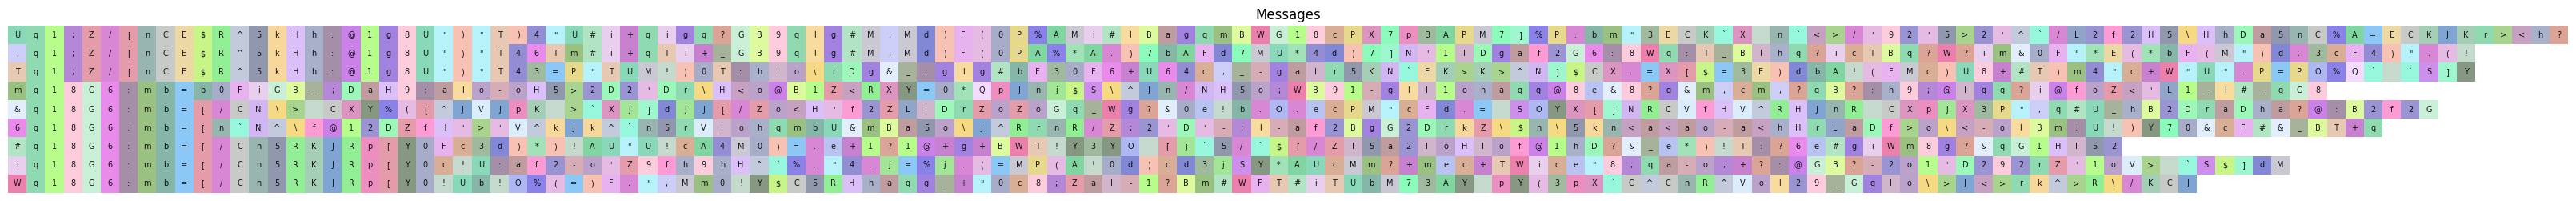

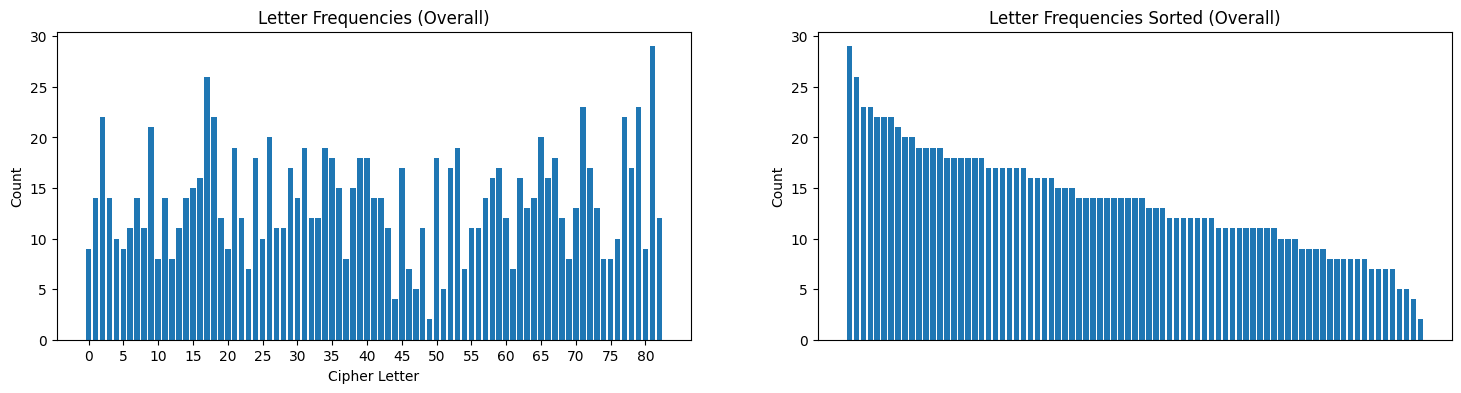

Letter Frequencies (Per message)
--------------------------------


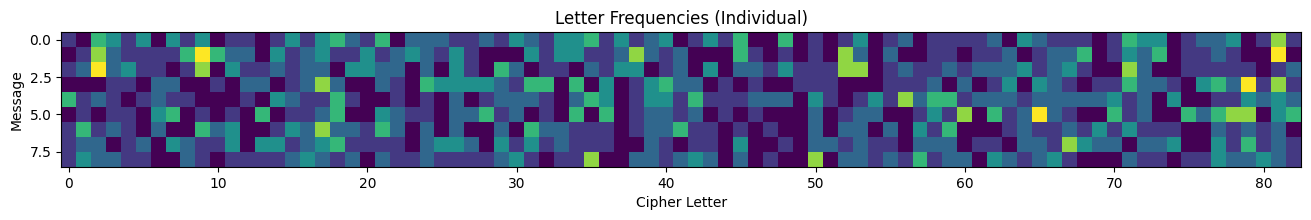

Kappa Auto-Correlation Test
---------------------------


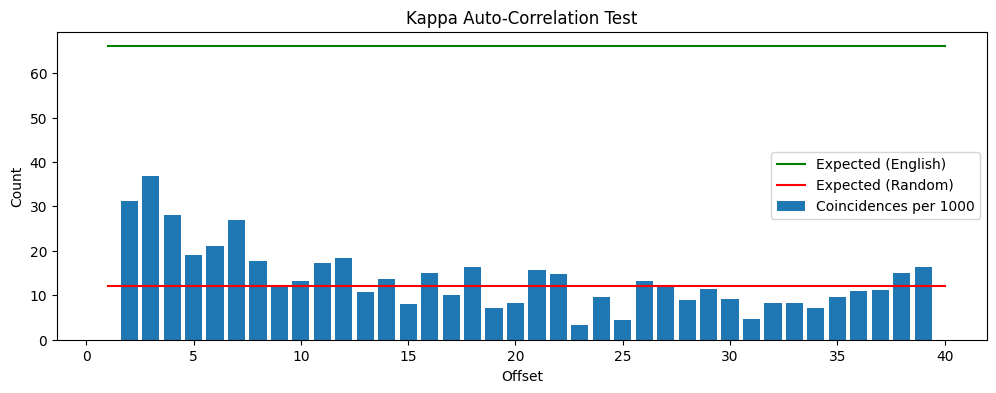

Kappa Periodic Test
-------------------


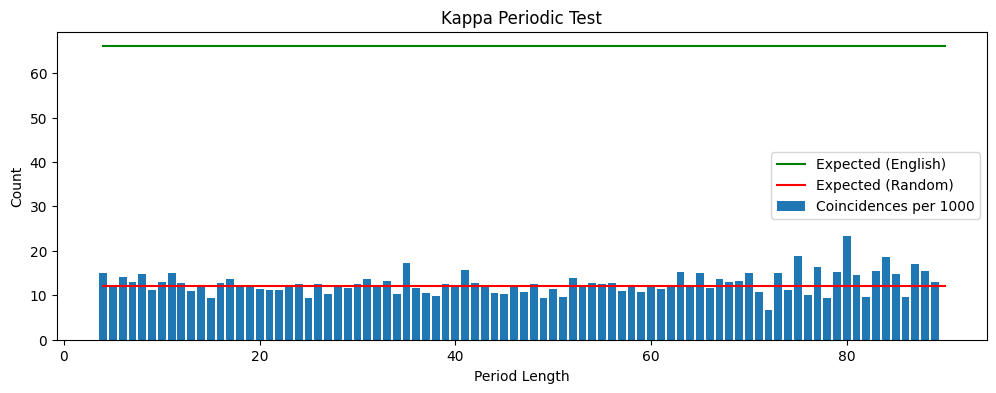

In [2]:
analysis.full_overview(msgs)
analysis.plot_msgs_kappa_auto(msgs)
analysis.plot_msgs_kappa_periodic(msgs)


In [3]:
isos_19 = analysis.calc_isomorphs(msgs[0:9])
isos_13 = analysis.calc_isomorphs(msgs[0:3])
isos_46 = analysis.calc_isomorphs(msgs[3:6])
isos_79 = analysis.calc_isomorphs(msgs[6:9])


In [ ]:
isos_im_19 = analysis.conv_isomorphs_to_img(msgs[0:9], isos_19, 0)
isos_im_13 = analysis.conv_isomorphs_to_img(msgs[0:3], isos_13, 0)
isos_im_46 = analysis.conv_isomorphs_to_img(msgs[3:6], isos_46, 0)
isos_im_79 = analysis.conv_isomorphs_to_img(msgs[6:9], isos_79, 0)

analysis.plot_im(
    im=isos_im_19,
    to_dull=True,
    under_value=0.1,
    labels=msgs[0:9],
    title="(1-9) Isomorphs",
    figsize=(28,2))

analysis.plot_im(
    im=isos_im_13,
    to_dull=True,
    under_value=0.1,
    labels=msgs[0:3],
    title="(1-3) Isomorphs",
    figsize=(28,2))

analysis.plot_im(
    im=isos_im_46,
    to_dull=True,
    labels=msgs[3:6],
    title="(4-6) Isomorphs",
    figsize=(28,2))

analysis.plot_im(
    im=isos_im_79,
    to_dull=True,
    under_value=0.1,
    labels=msgs[6:9],
    title="(7-9) Isomorphs",
    figsize=(28,2))

plt.show()
